In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
folder_path = r"C:\Users\medici\901"
file_name = "learning1_data.csv"
file_path = os.path.join(folder_path, file_name)

data1 = pd.read_csv(file_path)

print(data1.head())

          0         1         2         3         4         5         6  \
0 -0.202268 -0.353959 -0.119095  0.247844  0.120783 -0.263038 -0.537206   
1  0.809660  0.977984 -0.025524 -1.094791 -1.556198 -0.060669  1.057084   
2 -0.283242 -0.188273 -0.175738 -0.118942 -0.096620  0.050365 -0.066805   
3  0.144290  0.030802  0.245908  0.400738  0.250939  0.376150 -0.265817   
4  0.147031  0.113169  0.218939 -0.442279 -0.780985 -0.673755 -0.355651   

          7         8         9  ...     25591     25592     25593     25594  \
0 -0.576838 -0.453532 -0.279206  ...  0.071124  0.173103  0.548901  0.481414   
1  0.878002  0.246451 -0.800890  ... -0.246382  0.358700  0.048618 -0.172239   
2 -0.234286  0.166423  0.164054  ... -0.197872  0.999439  0.847681  0.051769   
3  0.010329  0.693247 -0.277882  ... -0.855152 -1.051428 -1.167517 -1.048143   
4 -0.073637 -0.030152  0.159664  ... -0.257708 -0.140300  0.295603 -0.060675   

      25595     25596     25597     25598     25599  fault_type  
0 

## 내륜결함

In [3]:
inner_first_row = data1.iloc[0, :-1].values

In [4]:
sampling_rate=25600
# Perform FFT on the data
fft_values = np.fft.fft(inner_first_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(inner_first_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)


In [5]:
ftf_freq = 11
bpfo_freq = 140
bpfi_freq = 219.7
bsf_freq = 64.69

In [6]:
# 결함 주파수에 대한 대역폭 (필터링 범위를 설정합니다)
bandwidth = 20  # 예시로 50Hz 대역폭 사용

# 주파수 필터링 (결함 주파수 범위에 해당하는 부분만 선택)
bpfo_range = (frequencies > bpfo_freq - bandwidth) & (frequencies < bpfo_freq + bandwidth)
bpfi_range = (frequencies > bpfi_freq - bandwidth) & (frequencies < bpfi_freq + bandwidth)
ftf_range = (frequencies > ftf_freq - bandwidth) & (frequencies < ftf_freq + bandwidth)
bsf_range = (frequencies > bsf_freq - bandwidth) & (frequencies < bsf_freq + bandwidth)

In [7]:
#300까지 자르기
max_freq = 300
freq_range = (frequencies >= 0) & (frequencies <= max_freq)

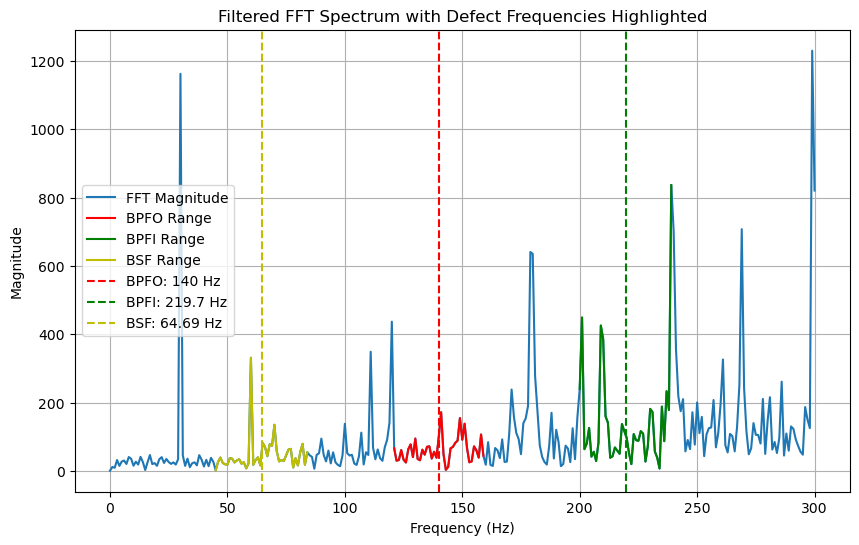

In [10]:
plt.figure(figsize=(10, 6))
# ~300Hz 주파수 스펙트럼 플롯
plt.plot(frequencies[freq_range], fft_magnitude[freq_range], label='FFT Magnitude')

# 결함 주파수 범위 강조 표시
plt.plot(frequencies[bpfo_range], fft_magnitude[bpfo_range], 'r', label='BPFO Range')
plt.plot(frequencies[bpfi_range], fft_magnitude[bpfi_range], 'g', label='BPFI Range')
#plt.plot(frequencies[ftf_range], fft_magnitude[ftf_range], 'b', label='FTF Range')
plt.plot(frequencies[bsf_range], fft_magnitude[bsf_range], 'y', label='BSF Range')

# 결함 주파수에 대한 수직선 추가
#plt.axvline(x=ftf_freq, color='b', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='r', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='g', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('Filtered FFT Spectrum with Defect Frequencies Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #내륜결함 BPFI

## 롤러결함

In [11]:
roller_first_row = data1.iloc[120, :-1].values

In [12]:
sampling_rate=25600
# Perform FFT on the data
fft_values = np.fft.fft(roller_first_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(roller_first_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

In [13]:
# 결함 주파수에 대한 대역폭 (필터링 범위를 설정합니다)
bandwidth = 20  # 예시로 50Hz 대역폭 사용

# 주파수 필터링 (결함 주파수 범위에 해당하는 부분만 선택)
bpfo_range = (frequencies > bpfo_freq - bandwidth) & (frequencies < bpfo_freq + bandwidth)
bpfi_range = (frequencies > bpfi_freq - bandwidth) & (frequencies < bpfi_freq + bandwidth)
ftf_range = (frequencies > ftf_freq - bandwidth) & (frequencies < ftf_freq + bandwidth)
bsf_range = (frequencies > bsf_freq - bandwidth) & (frequencies < bsf_freq + bandwidth)

In [14]:
#300까지 자르기
max_freq = 300
freq_range = (frequencies >= 0) & (frequencies <= max_freq)

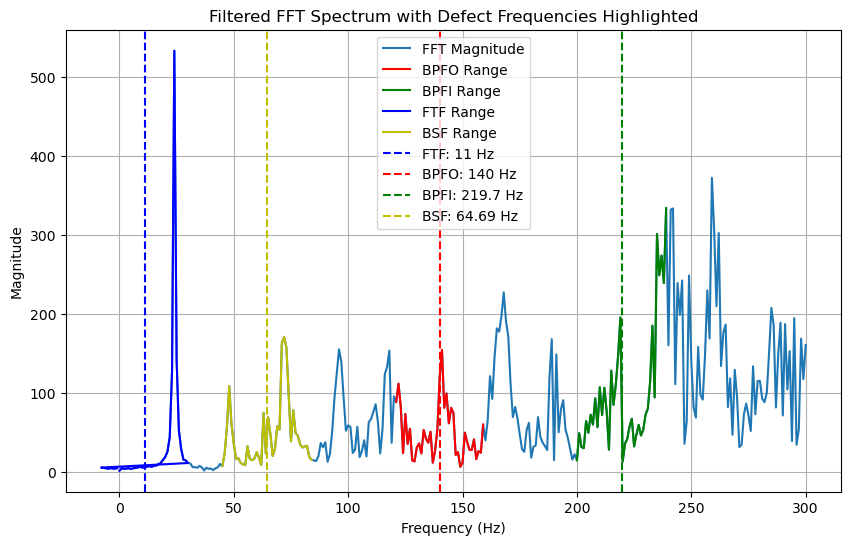

In [15]:
plt.figure(figsize=(10, 6))
# ~300Hz 주파수 스펙트럼 플롯
plt.plot(frequencies[freq_range], fft_magnitude[freq_range], label='FFT Magnitude')

# 결함 주파수 범위 강조 표시
plt.plot(frequencies[bpfo_range], fft_magnitude[bpfo_range], 'r', label='BPFO Range')
plt.plot(frequencies[bpfi_range], fft_magnitude[bpfi_range], 'g', label='BPFI Range')
plt.plot(frequencies[ftf_range], fft_magnitude[ftf_range], 'b', label='FTF Range')
plt.plot(frequencies[bsf_range], fft_magnitude[bsf_range], 'y', label='BSF Range')

# 결함 주파수에 대한 수직선 추가
plt.axvline(x=ftf_freq, color='b', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='r', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='g', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('Filtered FFT Spectrum with Defect Frequencies Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #롤러결함 BSF

## 외륜결함

In [21]:
outer_first_row = data1.iloc[240, :-1].values

In [22]:
sampling_rate=25600
# Perform FFT on the data
fft_values = np.fft.fft(outer_first_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(outer_first_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

In [23]:
# 결함 주파수에 대한 대역폭 (필터링 범위를 설정합니다)
bandwidth = 20  # 예시로 50Hz 대역폭 사용

# 주파수 필터링 (결함 주파수 범위에 해당하는 부분만 선택)
bpfo_range = (frequencies > bpfo_freq - bandwidth) & (frequencies < bpfo_freq + bandwidth)
bpfi_range = (frequencies > bpfi_freq - bandwidth) & (frequencies < bpfi_freq + bandwidth)
ftf_range = (frequencies > ftf_freq - bandwidth) & (frequencies < ftf_freq + bandwidth)
bsf_range = (frequencies > bsf_freq - bandwidth) & (frequencies < bsf_freq + bandwidth)

In [24]:
#300까지 자르기
max_freq = 300
freq_range = (frequencies >= 0) & (frequencies <= max_freq)

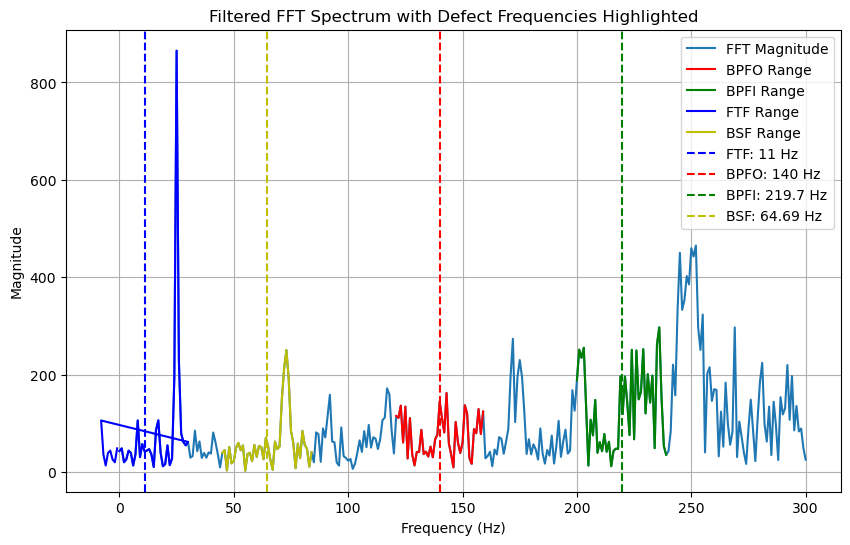

In [25]:
plt.figure(figsize=(10, 6))
# ~300Hz 주파수 스펙트럼 플롯
plt.plot(frequencies[freq_range], fft_magnitude[freq_range], label='FFT Magnitude')

# 결함 주파수 범위 강조 표시
plt.plot(frequencies[bpfo_range], fft_magnitude[bpfo_range], 'r', label='BPFO Range')
plt.plot(frequencies[bpfi_range], fft_magnitude[bpfi_range], 'g', label='BPFI Range')
plt.plot(frequencies[ftf_range], fft_magnitude[ftf_range], 'b', label='FTF Range')
plt.plot(frequencies[bsf_range], fft_magnitude[bsf_range], 'y', label='BSF Range')

# 결함 주파수에 대한 수직선 추가
plt.axvline(x=ftf_freq, color='b', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='r', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='g', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('Filtered FFT Spectrum with Defect Frequencies Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #외륜결함 BSPO

## 정상

In [27]:
normal_first_row = data1.iloc[360, :-1].values

In [29]:
sampling_rate=25600
# Perform FFT on the data
fft_values = np.fft.fft(normal_first_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(normal_first_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

In [30]:
# 결함 주파수에 대한 대역폭 (필터링 범위를 설정합니다)
bandwidth = 20  # 예시로 50Hz 대역폭 사용

# 주파수 필터링 (결함 주파수 범위에 해당하는 부분만 선택)
bpfo_range = (frequencies > bpfo_freq - bandwidth) & (frequencies < bpfo_freq + bandwidth)
bpfi_range = (frequencies > bpfi_freq - bandwidth) & (frequencies < bpfi_freq + bandwidth)
ftf_range = (frequencies > ftf_freq - bandwidth) & (frequencies < ftf_freq + bandwidth)
bsf_range = (frequencies > bsf_freq - bandwidth) & (frequencies < bsf_freq + bandwidth)

In [31]:
#300까지 자르기
max_freq = 300
freq_range = (frequencies >= 0) & (frequencies <= max_freq)

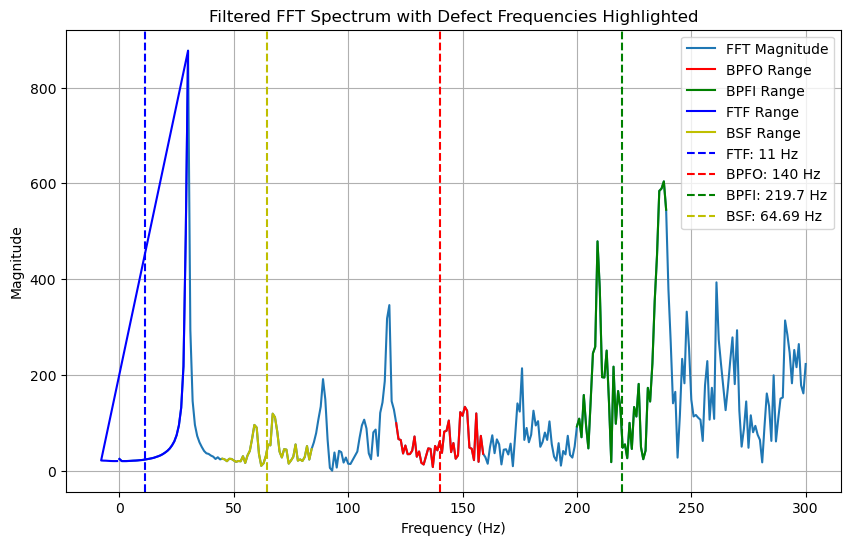

In [32]:
plt.figure(figsize=(10, 6))
# ~300Hz 주파수 스펙트럼 플롯
plt.plot(frequencies[freq_range], fft_magnitude[freq_range], label='FFT Magnitude')

# 결함 주파수 범위 강조 표시
plt.plot(frequencies[bpfo_range], fft_magnitude[bpfo_range], 'r', label='BPFO Range')
plt.plot(frequencies[bpfi_range], fft_magnitude[bpfi_range], 'g', label='BPFI Range')
plt.plot(frequencies[ftf_range], fft_magnitude[ftf_range], 'b', label='FTF Range')
plt.plot(frequencies[bsf_range], fft_magnitude[bsf_range], 'y', label='BSF Range')

# 결함 주파수에 대한 수직선 추가
plt.axvline(x=ftf_freq, color='b', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='r', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='g', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('Filtered FFT Spectrum with Defect Frequencies Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #외륜결함 BSPO

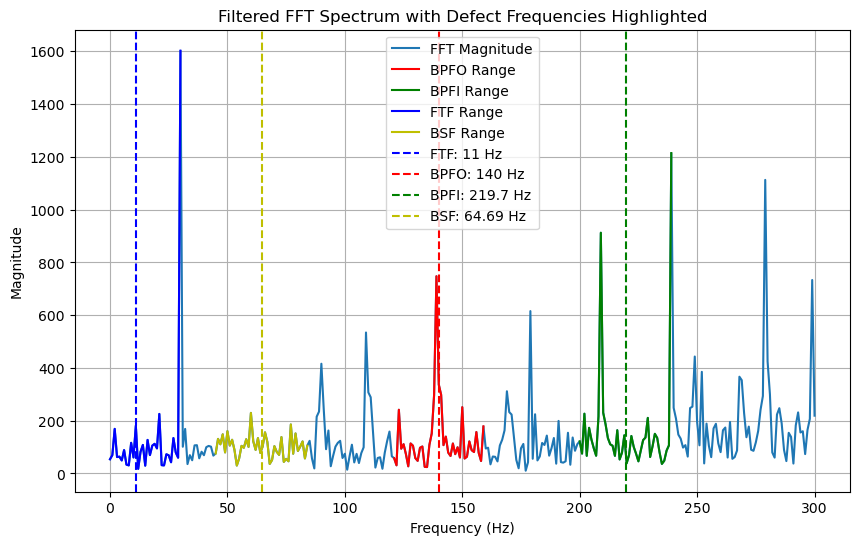

In [53]:
check_row = data1.iloc[330, :-1].values


sampling_rate = 25600
fft_values = np.fft.fft(check_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(check_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# 주파수 필터링: 0 이상의 주파수만 사용 (양수 주파수만 필터링)
positive_freqs = frequencies[:n // 2]
fft_magnitude = fft_magnitude[:n // 2]

# 결함 주파수에 대한 대역폭 (필터링 범위를 설정합니다)
bandwidth = 20  # 대역폭 설정

# 주파수 필터링 (결함 주파수 범위에 해당하는 부분만 선택)
bpfo_range = (positive_freqs > bpfo_freq - bandwidth) & (positive_freqs < bpfo_freq + bandwidth)
bpfi_range = (positive_freqs > bpfi_freq - bandwidth) & (positive_freqs < bpfi_freq + bandwidth)
ftf_range = (positive_freqs > ftf_freq - bandwidth) & (positive_freqs < ftf_freq + bandwidth)
bsf_range = (positive_freqs > bsf_freq - bandwidth) & (positive_freqs < bsf_freq + bandwidth)

# 0 ~ 300Hz 범위 필터링
max_freq = 300
freq_range = (positive_freqs >= 0) & (positive_freqs <= max_freq)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs[freq_range], fft_magnitude[freq_range], label='FFT Magnitude')

# 결함 주파수 범위 강조 표시
plt.plot(positive_freqs[bpfo_range], fft_magnitude[bpfo_range], 'r', label='BPFO Range')
plt.plot(positive_freqs[bpfi_range], fft_magnitude[bpfi_range], 'g', label='BPFI Range')
plt.plot(positive_freqs[ftf_range], fft_magnitude[ftf_range], 'b', label='FTF Range')
plt.plot(positive_freqs[bsf_range], fft_magnitude[bsf_range], 'y', label='BSF Range')

# 결함 주파수에 대한 수직선 추가
plt.axvline(x=ftf_freq, color='b', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='r', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='g', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('Filtered FFT Spectrum with Defect Frequencies Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()


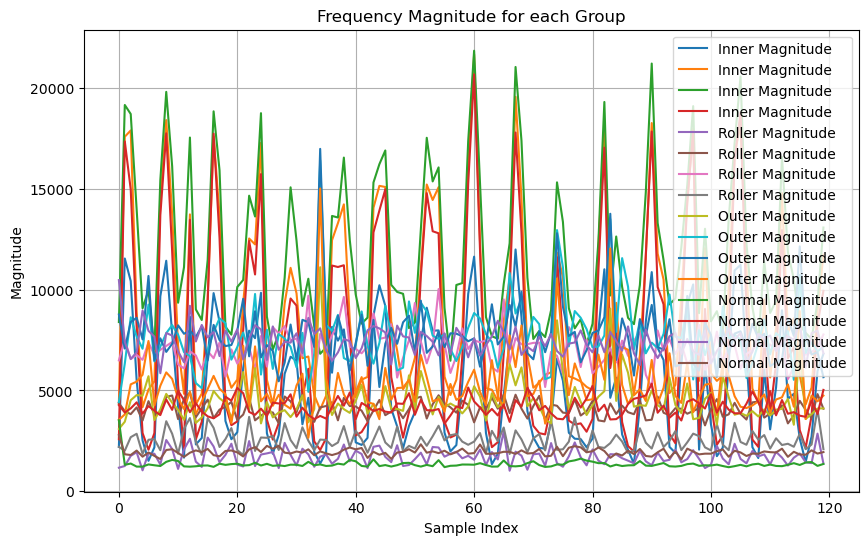

In [8]:
# 1. 각 인덱스 그룹을 다른 데이터프레임/넘파이로 만들기
inner = data1.iloc[0:120, :]   # 0 ~ 119
roller = data1.iloc[120:240, :]  # 120 ~ 239
outer = data1.iloc[240:360, :]  # 240 ~ 359
normal = data1.iloc[360:480, :]  # 360 ~ 479

# 필요한 주파수와 샘플링 레이트 설정
sampling_rate = 25600  # 25.6 kHz 샘플링 레이트
ftf_freq = 11
bpfo_freq = 140
bpfi_freq = 219.7
bsf_freq = 64.69

# 주파수와 진폭의 세기를 계산하는 함수
def calculate_fft_magnitude(data_group, sampling_rate, target_freqs, bandwidth=30):
    fft_magnitudes = []
    frequencies = np.fft.fftfreq(data_group.shape[1], d=1/sampling_rate)
    
    for _, signal in data_group.iterrows():
        # FFT 변환
        fft_values = np.fft.fft(signal)
        fft_magnitude = np.abs(fft_values)[:len(fft_values)//2]  # 양수 주파수만 선택
        pos_frequencies = frequencies[:len(frequencies)//2]  # 양수 주파수

        group_magnitudes = {}
        for freq in target_freqs:
            # 주파수 범위 설정: 음수 주파수는 0Hz로 제한
            low_bound = max(0, freq - bandwidth)  # 음수가 나오지 않도록 처리
            high_bound = freq + bandwidth

            # 주파수 대역 설정
            freq_range = (pos_frequencies >= low_bound) & (pos_frequencies <= high_bound)
            # 대역 내에서 진폭 합산
            magnitude_in_range = np.sum(fft_magnitude[freq_range])
            group_magnitudes[f'Freq_{freq}Hz'] = magnitude_in_range
        
        fft_magnitudes.append(group_magnitudes)
    
    return pd.DataFrame(fft_magnitudes)

# 2. 각 인덱스 그룹에서 주파수의 세기를 계산
target_frequencies = [ftf_freq, bpfo_freq, bpfi_freq, bsf_freq]

# 각 그룹의 주파수 세기를 계산
inner_magnitude = calculate_fft_magnitude(inner, sampling_rate, target_frequencies)
roller_magnitude = calculate_fft_magnitude(roller, sampling_rate, target_frequencies)
outer_magnitude = calculate_fft_magnitude(outer, sampling_rate, target_frequencies)
normal_magnitude = calculate_fft_magnitude(normal, sampling_rate, target_frequencies)

# 3. 그래프를 그리기 위한 예시
plt.figure(figsize=(10, 6))
plt.plot(inner_magnitude, label="Inner Magnitude")
plt.plot(roller_magnitude, label="Roller Magnitude")
plt.plot(outer_magnitude, label="Outer Magnitude")
plt.plot(normal_magnitude, label="Normal Magnitude")
plt.legend()
plt.grid(True)
plt.title("Frequency Magnitude for each Group")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.show()


In [1]:
# 주파수별로 차트를 분리하여 그리기
plt.figure(figsize=(10, 12))

# 각 주파수마다 별도의 차트를 생성
for idx, freq in enumerate(target_frequencies):
    plt.subplot(4, 1, idx + 1)
    plt.plot(inner_magnitude[f'Freq_{freq}Hz'], label='Inner Magnitude')
    plt.plot(roller_magnitude[f'Freq_{freq}Hz'], label='Roller Magnitude')
    plt.plot(outer_magnitude[f'Freq_{freq}Hz'], label='Outer Magnitude')
    plt.plot(normal_magnitude[f'Freq_{freq}Hz'], label='Normal Magnitude')
    
    plt.title(f'Magnitude for Frequency {freq}Hz')
    plt.xlabel('Sample Index')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

## [Shapiro-Wilk 정규성 검정]
 * 귀무가설: 데이터가 정규 분포를 따를 것이다.
 * p-value < 0.05인 경우: 귀무가설을 기각하므로, 데이터가 정규 분포를 따르지 않는다.

In [9]:
from scipy.stats import shapiro

# 정규성 검정을 위한 Freq_219.7Hz 열 추출
datasets = {
    'Inner': inner_magnitude['Freq_219.7Hz'],
    'Outer': outer_magnitude['Freq_219.7Hz'],
    'Roller': roller_magnitude['Freq_219.7Hz'],
    'Normal': normal_magnitude['Freq_219.7Hz']
}

# 각 데이터셋에 대해 정규성 검정 수행
for name, data in datasets.items():
    w_stat, p_value = shapiro(data)
    print(f"{name} - W-statistic: {w_stat}, p-value: {p_value}")

Inner - W-statistic: 0.9059173364822439, p-value: 3.9887282057356554e-07
Outer - W-statistic: 0.8019225622717003, p-value: 2.0028437997312946e-11
Roller - W-statistic: 0.9594910211227082, p-value: 0.0011517057851355606
Normal - W-statistic: 0.9569017971840817, p-value: 0.0007191617646934031


## [Mann-Whitney U 검정]
 * 비모수 검정
 * 두 그룹 간의 차이를 비교할 때 데이터가 정규 분포를 따르지 않는 경우에도 사용
 * 순위 기반으로 두 그룹의 차이를 평가
 * 결론 : 모든 비교에서 p-value가 매우 낮아(유의 수준 0.05보다 작음) Inner 데이터의 Freq_219.7Hz 값이 다른 데이터셋과 유의미하게 차이가 있다

In [10]:
inner_219 = inner_magnitude['Freq_219.7Hz']
outer_219 = outer_magnitude['Freq_219.7Hz']
roller_219 = roller_magnitude['Freq_219.7Hz']
normal_219 =  normal_magnitude['Freq_219.7Hz']

In [11]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U 검정
u_outer, p_outer = mannwhitneyu(inner_219, outer_219)
u_roller, p_roller = mannwhitneyu(inner_219, roller_219)
u_normal, p_normal = mannwhitneyu(inner_219, normal_219)

print("Inner vs Outer - U-statistic:", u_outer, ", p-value:", p_outer)
print("Inner vs Roller - U-statistic:", u_roller, ", p-value:", p_roller)
print("Inner vs Normal - U-statistic:", u_normal, ", p-value:", p_normal)

Inner vs Outer - U-statistic: 12425.0 , p-value: 2.6008996780922087e-22
Inner vs Roller - U-statistic: 13568.0 , p-value: 2.4103005701232523e-32
Inner vs Normal - U-statistic: 13235.0 , p-value: 3.2061975417764504e-29


## [Kruskal-Wallis 검정 코드]
 * 세 개 이상의 그룹 간의 차이를 검정할 때 사용되는 비모수 검정
 * 데이터가 정규 분포를 따르지 않는 경우에도 사용
 * p-value가 1.547e-42로 매우 작기 때문에(일반적으로 유의 수준인 0.05보다 훨씬 작음), 귀무가설을 기각합니다.
 * 귀무가설: 모든 그룹의 중앙값이 동일하다.

In [12]:
from scipy.stats import kruskal

# Kruskal-Wallis 검정 수행
kruskal_stat, kruskal_p_value = kruskal(inner_219, outer_219, roller_219, normal_219)

print("Kruskal-Wallis H-statistic:", kruskal_stat)
print("p-value:", kruskal_p_value)

Kruskal-Wallis H-statistic: 197.38765159390164
p-value: 1.547390193628517e-42


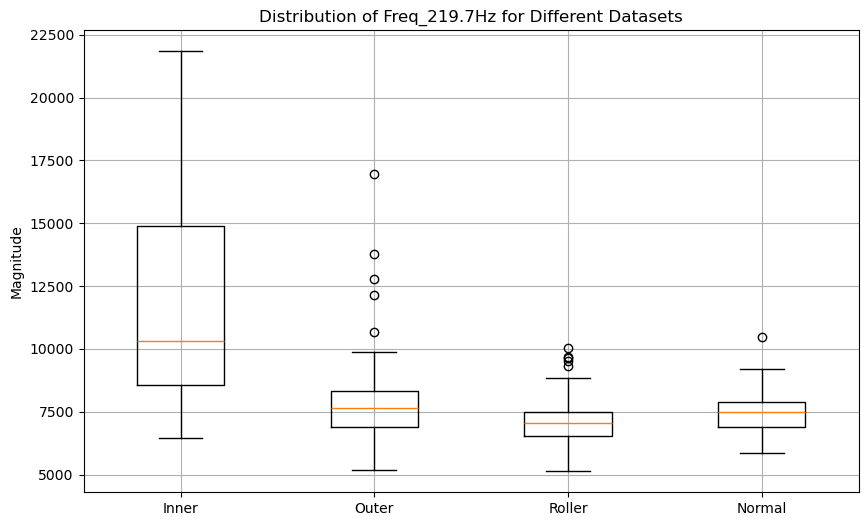

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot([inner_219, outer_219, roller_219, normal_219], tick_labels=['Inner', 'Outer', 'Roller', 'Normal'])
plt.title('Distribution of Freq_219.7Hz for Different Datasets')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


In [15]:
datasets = {
    'Inner': inner_magnitude['Freq_140Hz'],
    'Outer': outer_magnitude['Freq_140Hz'],
    'Roller': roller_magnitude['Freq_140Hz'],
    'Normal': normal_magnitude['Freq_140Hz']
}

# 각 데이터셋에 대해 정규성 검정 수행
for name, data in datasets.items():
    w_stat, p_value = shapiro(data)
    print(f"{name} - W-statistic: {w_stat}, p-value: {p_value}")

#정규성X

Inner - W-statistic: 0.8818744275829791, p-value: 2.5789737531341184e-08
Outer - W-statistic: 0.8758851743409638, p-value: 1.375510659322972e-08
Roller - W-statistic: 0.9713959536030731, p-value: 0.011651495564364596
Normal - W-statistic: 0.9677558991468707, p-value: 0.005593510906883125


In [16]:
inner_140 = inner_magnitude['Freq_140Hz']
outer_140 = outer_magnitude['Freq_140Hz']
roller_140 = roller_magnitude['Freq_140Hz']
normal_140 =  normal_magnitude['Freq_140Hz']

In [20]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U 검정
u_outer, p_outer = mannwhitneyu(inner_140, outer_140)
u_roller, p_roller = mannwhitneyu(outer_140, roller_140)
u_normal, p_normal = mannwhitneyu(outer_140, normal_140)

print("Inner vs Outer - U-statistic:", u_outer, ", p-value:", p_outer)
print("Inner vs Roller - U-statistic:", u_roller, ", p-value:", p_roller)
print("Inner vs Normal - U-statistic:", u_normal, ", p-value:", p_normal)


Inner vs Outer - U-statistic: 7325.0 , p-value: 0.8169184303358974
Inner vs Roller - U-statistic: 14371.0 , p-value: 1.4742510575674697e-40
Inner vs Normal - U-statistic: 14353.0 , p-value: 2.307979532784333e-40


In [18]:
from scipy.stats import kruskal

# Kruskal-Wallis 검정 수행
kruskal_stat, kruskal_p_value = kruskal(inner_140, outer_140, roller_140, normal_140)

print("Kruskal-Wallis H-statistic:", kruskal_stat)
print("p-value:", kruskal_p_value)

Kruskal-Wallis H-statistic: 335.3356159043665
p-value: 2.2323663946140422e-72


In [2]:
plt.figure(figsize=(10, 6))
plt.boxplot([inner_140, outer_140, roller_140, normal_140], tick_labels=['Inner', 'Outer', 'Roller', 'Normal'])
plt.title('Distribution of Freq_140Hz for Different Datasets')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [21]:
# 정규성 검정을 위한 Freq_219.7Hz 열 추출
datasets = {
    'Inner': inner_magnitude['Freq_64.69Hz'],
    'Outer': outer_magnitude['Freq_64.69Hz'],
    'Roller': roller_magnitude['Freq_64.69Hz'],
    'Normal': normal_magnitude['Freq_64.69Hz']
}

# 각 데이터셋에 대해 정규성 검정 수행
for name, data in datasets.items():
    w_stat, p_value = shapiro(data)
    print(f"{name} - W-statistic: {w_stat}, p-value: {p_value}")

Inner - W-statistic: 0.8862514458227934, p-value: 4.133894773824618e-08
Outer - W-statistic: 0.7484744631030141, p-value: 4.698211711943433e-13
Roller - W-statistic: 0.9539951490474237, p-value: 0.0004294674611753942
Normal - W-statistic: 0.9499660417302326, p-value: 0.00021482905953495781


In [22]:
inner_64 = inner_magnitude['Freq_64.69Hz']
outer_64 = outer_magnitude['Freq_64.69Hz']
roller_64 = roller_magnitude['Freq_64.69Hz']
normal_64 =  normal_magnitude['Freq_64.69Hz']

In [23]:
# Mann-Whitney U 검정
u_outer, p_outer = mannwhitneyu(inner_64, roller_64)
u_roller, p_roller = mannwhitneyu(outer_64, roller_64)
u_normal, p_normal = mannwhitneyu(normal_64, roller_64)

print("Inner vs Outer - U-statistic:", u_outer, ", p-value:", p_outer)
print("Inner vs Roller - U-statistic:", u_roller, ", p-value:", p_roller)
print("Inner vs Normal - U-statistic:", u_normal, ", p-value:", p_normal)

Inner vs Outer - U-statistic: 12575.0 , p-value: 1.6192902719112785e-23
Inner vs Roller - U-statistic: 14317.0 , p-value: 5.637691390330108e-40
Inner vs Normal - U-statistic: 1437.0 , p-value: 8.61056512560184e-27


In [24]:
# Kruskal-Wallis 검정 수행
kruskal_stat, kruskal_p_value = kruskal(inner_64, outer_64, roller_64, normal_64)

print("Kruskal-Wallis H-statistic:", kruskal_stat)
print("p-value:", kruskal_p_value)

Kruskal-Wallis H-statistic: 347.2513262300763
p-value: 5.872728391907309e-75


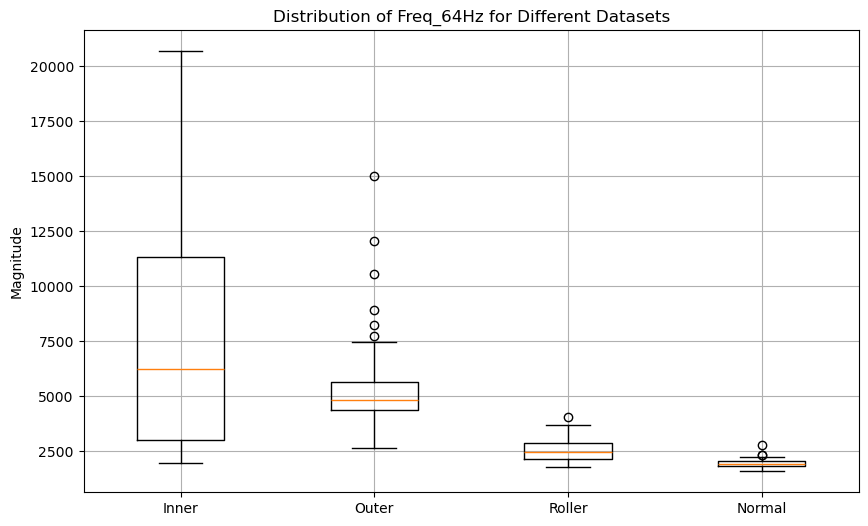

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot([inner_64, outer_64, roller_64, normal_64], tick_labels=['Inner', 'Outer', 'Roller', 'Normal'])
plt.title('Distribution of Freq_64Hz for Different Datasets')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()